In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [19]:
# 2. Đọc file dữ liệu chứng khoán JPY và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GBPUSDX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,1.353107,1.355014,1.346185,1.352997,1.352997,0.0
1,2017-12-04,1.349073,1.353858,1.342246,1.349400,1.349400,0.0
2,2017-12-05,1.347527,1.348072,1.337614,1.347527,1.347527,0.0
3,2017-12-06,1.341562,1.343725,1.336059,1.341526,1.341526,0.0
4,2017-12-07,1.339154,1.343111,1.332339,1.339226,1.339226,0.0
...,...,...,...,...,...,...,...
1436,2023-06-05,1.242993,1.244091,1.236965,1.243024,1.243024,0.0
1437,2023-06-06,1.243286,1.245842,1.239357,1.243317,1.243317,0.0
1438,2023-06-07,1.243147,1.249969,1.239618,1.242854,1.242854,0.0
1439,2023-06-08,1.244725,1.255713,1.244199,1.244586,1.244586,0.0


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,1.296675,1.301446,1.291599,1.296699,1.296699,0.0
std,0.068166,0.067378,0.068891,0.068172,0.068172,0.0
min,1.072846,1.083541,1.037904,1.072754,1.072754,0.0
25%,1.246778,1.250672,1.241434,1.246455,1.246455,0.0
50%,1.301507,1.305560,1.296596,1.301304,1.301304,0.0
75%,1.350266,1.354766,1.345329,1.350088,1.350088,0.0
max,1.434185,1.437711,1.429409,1.434206,1.434206,0.0


In [21]:
df1=df[['Date','Close']]
df1

,Date,Close
0,2017-12-01,1.352997
1,2017-12-04,1.349400
2,2017-12-05,1.347527
3,2017-12-06,1.341526
4,2017-12-07,1.339226
...,...,...
1436,2023-06-05,1.243024
1437,2023-06-06,1.243317
1438,2023-06-07,1.242854
1439,2023-06-08,1.244586


In [22]:
df1=df1.set_index('Date')
df1

,Close
Date,
2017-12-01,1.352997
2017-12-04,1.349400
2017-12-05,1.347527
2017-12-06,1.341526
2017-12-07,1.339226
...,...
2023-06-05,1.243024
2023-06-06,1.243317
2023-06-07,1.242854


In [23]:
df1.index=pd.to_datetime(df1.index)
df1

,Close
Date,
2017-12-01,1.352997
2017-12-04,1.349400
2017-12-05,1.347527
2017-12-06,1.341526
2017-12-07,1.339226
...,...
2023-06-05,1.243024
2023-06-06,1.243317
2023-06-07,1.242854


In [24]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

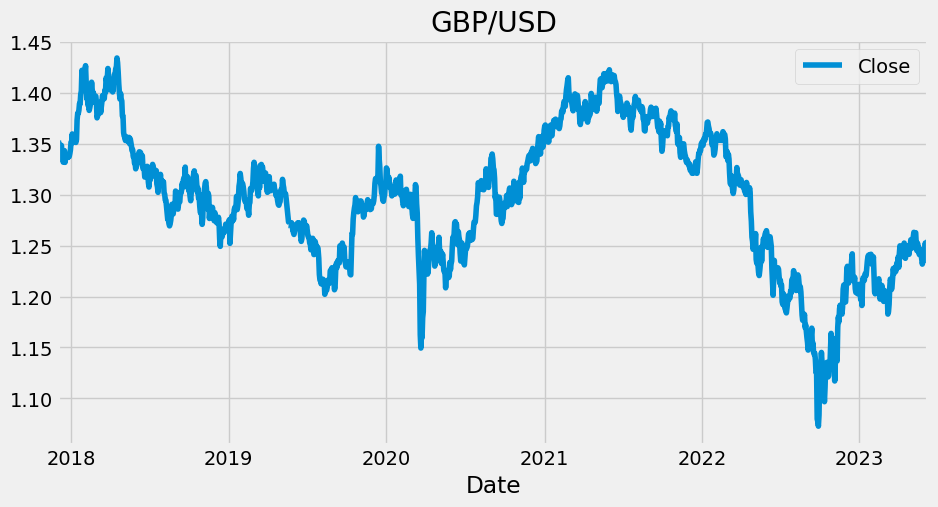

In [25]:
df1.plot(style='-',
        figsize=(10, 5),
        color=color_pal[0],
        title='GBP/USD')
plt.show()

In [26]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [28]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [29]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [30]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1.3429496  1.34297737 1.34300514 1.34303291 1.34306068 1.34308845
 1.34311622 1.34314399 1.34317176 1.34319953 1.3432273  1.34325507
 1.34328284 1.34331061 1.34333838 1.34336615 1.34339392 1.34342169
 1.34344946 1.34347723 1.343505   1.34353277 1.34356054 1.34358831
 1.34361608 1.34364385 1.34367162 1.34369939 1.34372716 1.34375493]


In [31]:
# Chia train test lại
train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [32]:
# 7. Đánh giá độ chính xác validate, test
##RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
##MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

##MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 0.1171189877250161
Testing RMSE: 0.11280588124469841
Validation MAPE: 9.45819955059323
Testing MAPE: 7.126275721857482
Validation MAE: 0.11554468274322534
Testing MAE: 0.08472625066571089


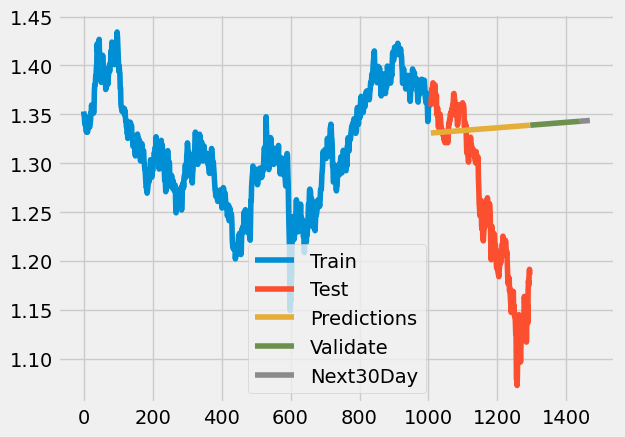

In [33]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [34]:
test_data.index

RangeIndex(start=1007, stop=1295, step=1)